<a href="https://colab.research.google.com/github/modem0011/Machine-Learning/blob/master/Sales%20Prediction(MLR)/Sales_Prediction_Using_Multi_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
advertising=pd.read_csv("advertising.csv")

In [ ]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
advertising.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [ ]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## **Visualize**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


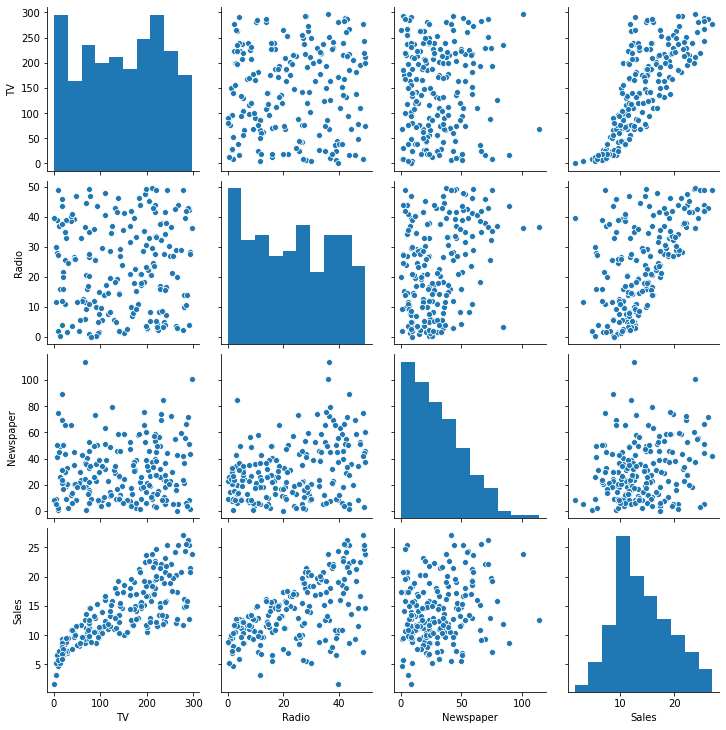

In [ ]:
sns.pairplot(advertising)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


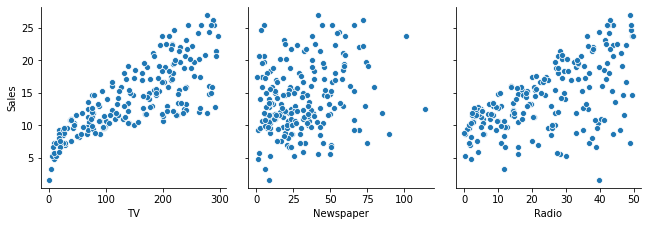

In [ ]:
sns.pairplot(advertising,x_vars=["TV","Newspaper","Radio"],y_vars="Sales",size=3)  # size is image size
plt.show()

In [ ]:
x=advertising[["TV","Newspaper","Radio"]]

In [ ]:
y=advertising["Sales"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

#**Model**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm=LinearRegression()

In [ ]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lm.intercept_

2.99489303049533

In [ ]:
lm.coef_

array([ 0.04458402, -0.00278146,  0.19649703])

In [43]:
pd.DataFrame(lm.coef_,x_train.columns)

,0
TV,0.044584
Newspaper,-0.002781
Radio,0.196497


#**Predict**


In [44]:
y_pred=lm.predict(x_test)

In [45]:
y_pred

array([10.05739563,  7.4522807 ,  7.0197076 , 24.08029725, 12.01786259,
        6.53793858, 12.78286918, 15.10974587, 10.76974013, 16.34357951,
       22.88297477,  9.12924467, 10.46455672, 15.48743552, 11.58555633,
       12.17296914, 18.76551502, 10.78318566, 15.90515992, 17.30651279,
       24.06692057,  9.59834224, 15.13512211, 12.38591525,  5.71360885,
       15.24749314, 12.29402334, 20.9421167 , 13.40991558,  9.04348832,
       12.89239415, 21.40272028, 18.13802209, 21.17320803,  6.56974433,
        6.14114206,  7.89018394, 13.01541434, 14.68953791,  6.18835143])

In [46]:
from sklearn.metrics import r2_score,mean_squared_error

In [47]:
mse=mean_squared_error(y_test,y_pred)

In [48]:
r2=r2_score(y_test,y_pred)

In [49]:
mse

4.402118291449685

In [50]:
r2

0.8601145185017868

#**Checking P value**


In [61]:
import statsmodels.api as sm

In [62]:
x1=sm.add_constant(x_train)

In [63]:
l=sm.OLS(y_train,x1).fit()

In [64]:
l.params

const        2.994893
TV           0.044584
Newspaper   -0.002781
Radio        0.196497
dtype: float64

In [65]:
l.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     505.4
Date:                Wed, 15 Jul 2020   Prob (F-statistic):           4.23e-80
Time:                        16:47:26   Log-Likelihood:                -297.29
No. Observations:                 160   AIC:                             602.6
Df Residuals:                     156   BIC:                             614.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9949      0.330      9.076      0.000       2.343       3.647
TV             0.0446      0.001     30.212      0.000       0.042       0.047
Newspaper     -0.0028      0.006     -0.451      0.653      -0.015       0.009
Radio          0.1965      0.009     21.994      0.000       0.179       0.214
==============================================================================
Omnibus:                       13.557   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.174
Skew:                          -0.754   Prob(JB):                     0.000507
Kurtosis:                       2.990   Cond. No.                         468.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


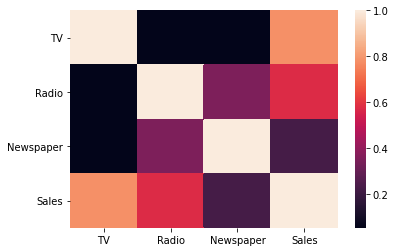

In [67]:
sns.heatmap(advertising.corr())

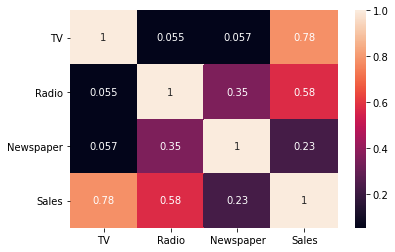

In [72]:
sns.heatmap(advertising.corr(),annot=True)
plt.show()

In [74]:
# p value of newspaper > 0.05  and correlation also less 0.23 so removing it.

In [95]:
x_train1=x_train[["TV","Radio"]]

In [96]:
x_test1=x_test[["TV","Radio"]]

In [97]:
lm=LinearRegression()

In [98]:
lm.fit(x_train1,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
a=lm.predict(x_test1)

In [100]:
mse=mean_squared_error(y_test,a)

In [101]:
r2=r2_score(y_test,a)

In [102]:
mse

4.391429763581883

In [103]:
r2

0.8604541663186569

#Plot

In [107]:
y_test.shape

(40,)

In [108]:
c=[i for i in range(40)]

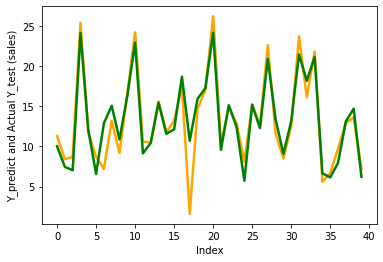

In [123]:
plt.plot(c,y_test,color="orange",linewidth=2.5,linestyle="-")
plt.plot(c,a,color="green",linewidth=2.5,linestyle="-")
plt.xlabel("Index")
plt.ylabel("Y_predict and Actual Y_test (sales)")
plt.show()

[]

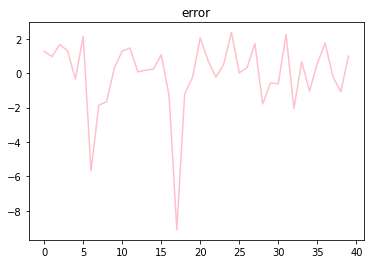

In [124]:
plt.plot(c,y_test-a,color="pink")
plt.title("error")
plt.plot()

In [117]:
import statsmodels.api as sm

In [119]:
x=sm.add_constant(x_train1)

In [120]:
l=sm.OLS(y_train,x).fit()

In [121]:
l.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     761.9
Date:                Wed, 15 Jul 2020   Prob (F-statistic):           1.50e-81
Time:                        17:17:32   Log-Likelihood:                -297.40
No. Observations:                 160   AIC:                             600.8
Df Residuals:                     157   BIC:                             610.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9514      0.315      9.377      0.000       2.330       3.573
TV             0.0445      0.001     30.401      0.000       0.042       0.047
Radio          0.1952      0.008     23.123      0.000       0.179       0.212
==============================================================================
Omnibus:                       13.633   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.256
Skew:                          -0.756   Prob(JB):                     0.000487
Kurtosis:                       3.000   Cond. No.                         442.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""